In [1]:
from scripts.figures_import_helper import *
%matplotlib inline

before/after industry comparisons, using national data

In [2]:
filename = 'tsuchiura_data.csv'
tsuchiura_data = auction_data.AuctionData(os.path.join(path_data, filename))

filename = 'municipal_pub_reserve_no_pricefloor.csv'
other_data = auction_data.AuctionData(os.path.join(path_data, filename))

In [3]:
s1 = set(other_data.df_bids.pid)
s2 = set(tsuchiura_data.df_bids.pid)

assert len(s2.intersection(s1)) == 0

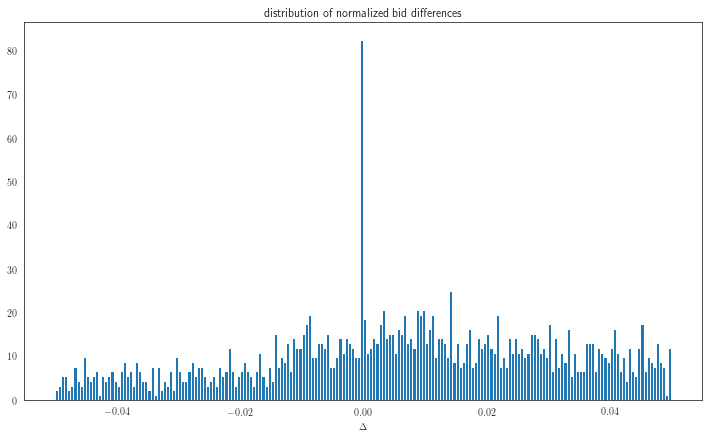

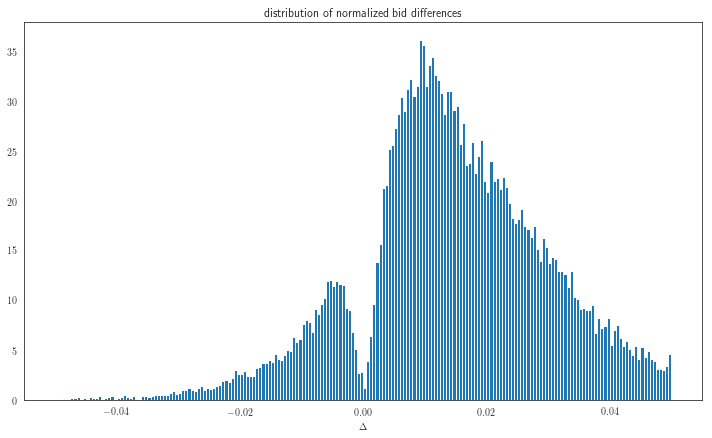

In [4]:
all_bids = pd.concat((other_data.df_bids, tsuchiura_data.df_bids), axis=0)
data_low = auction_data.AuctionData.from_clean_bids(all_bids.loc[all_bids.norm_bid < .9])
data_high = auction_data.AuctionData.from_clean_bids(all_bids.loc[all_bids.norm_bid > .9])
                                                     
plot_delta(data_low, filename='R2/city_delta_low')
plot_delta(data_high, filename='R2/city_delta_high')

In [6]:
deviations  = [-.025, 0, .001]
list_solutions = []
for data in [data_low, data_high]:    
    solutions, ties = compute_solution_parallel(
        data, deviations)
    list_solutions.append(1 - ties - solutions * (1-ties))

saving plot



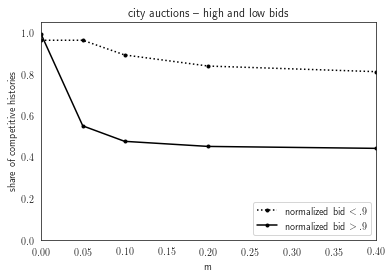

In [9]:
print('saving plot\n')
pretty_plot(
    'R2/city auctions -- high and low bids',
    list_solutions,
    ['normalized bid $ < .9$', 'normalized bid $> .9$'],
    xlabel='m',
    xticks=r2_min_mkps
)

In [10]:
print('saving data\n')
save2frame(list_solutions,
           ['min_m={}'.format(m) for m in r2_min_mkps],
           'R2/city_auctions_high_low')

saving data

